In [1]:
from python_scripts.diversification import TriggerSimulation
from python_scripts.dynamic_asset_allocation import DAASimulation
from python_scripts.data_and_descriptives import *

from datetime import date
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#### Import data

[*********************100%***********************]  5 of 5 completed


Ticker,AUSF,LVHI,MLPA,SQLV,XLK
Date,,,,,
2020-01-02,22.478361,19.642349,28.883467,26.034203,88.833046
2020-01-03,22.452583,19.573965,29.210041,26.049089,87.834274
2020-01-06,22.409622,19.627075,29.609180,25.977434,88.043533
2020-01-07,22.349472,19.624166,29.826895,25.908567,88.005478
2020-01-08,22.401026,19.715099,29.645466,25.857380,88.947212
...,...,...,...,...,...
2025-09-25,45.779999,34.580002,49.040001,42.540001,278.000000
2025-09-26,46.119999,34.720001,49.279999,43.009998,278.839996
2025-09-29,46.340000,34.700001,48.470001,42.680000,280.329987


using CLOSING PRICES...


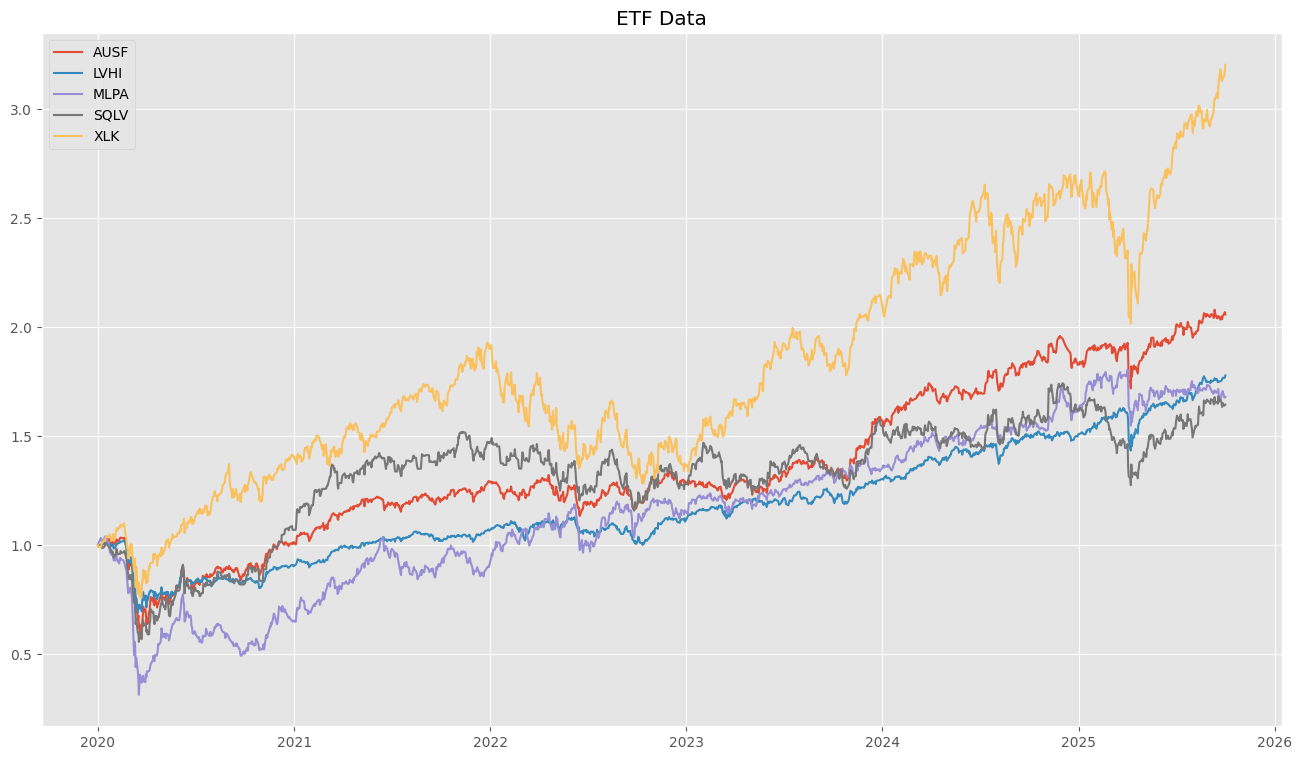

In [2]:
freq = "1d"
tickers = ['AUSF','LVHI', 'SQLV','MLPA','XLK']
start = '2020-01-01'
end = date.today()
prices = data_yahoo(tickers,freq, start, end, ['Adj Close'], False)
display(prices)
prices = fix_na_data_yahoo(prices)
prices = normalize_data(prices, False, 1, True, True)
returns = prices.pct_change().dropna()

### Backtest of diversification algorithm

##### Try rebalancing with stop loss and take profit

backtesting ew_cap_floor strategy using thresholds (% return) of [0.1, 0.1]
using cash_bank as safe asset...
using RETURNS...
--- 0.5926907062530518 seconds ---


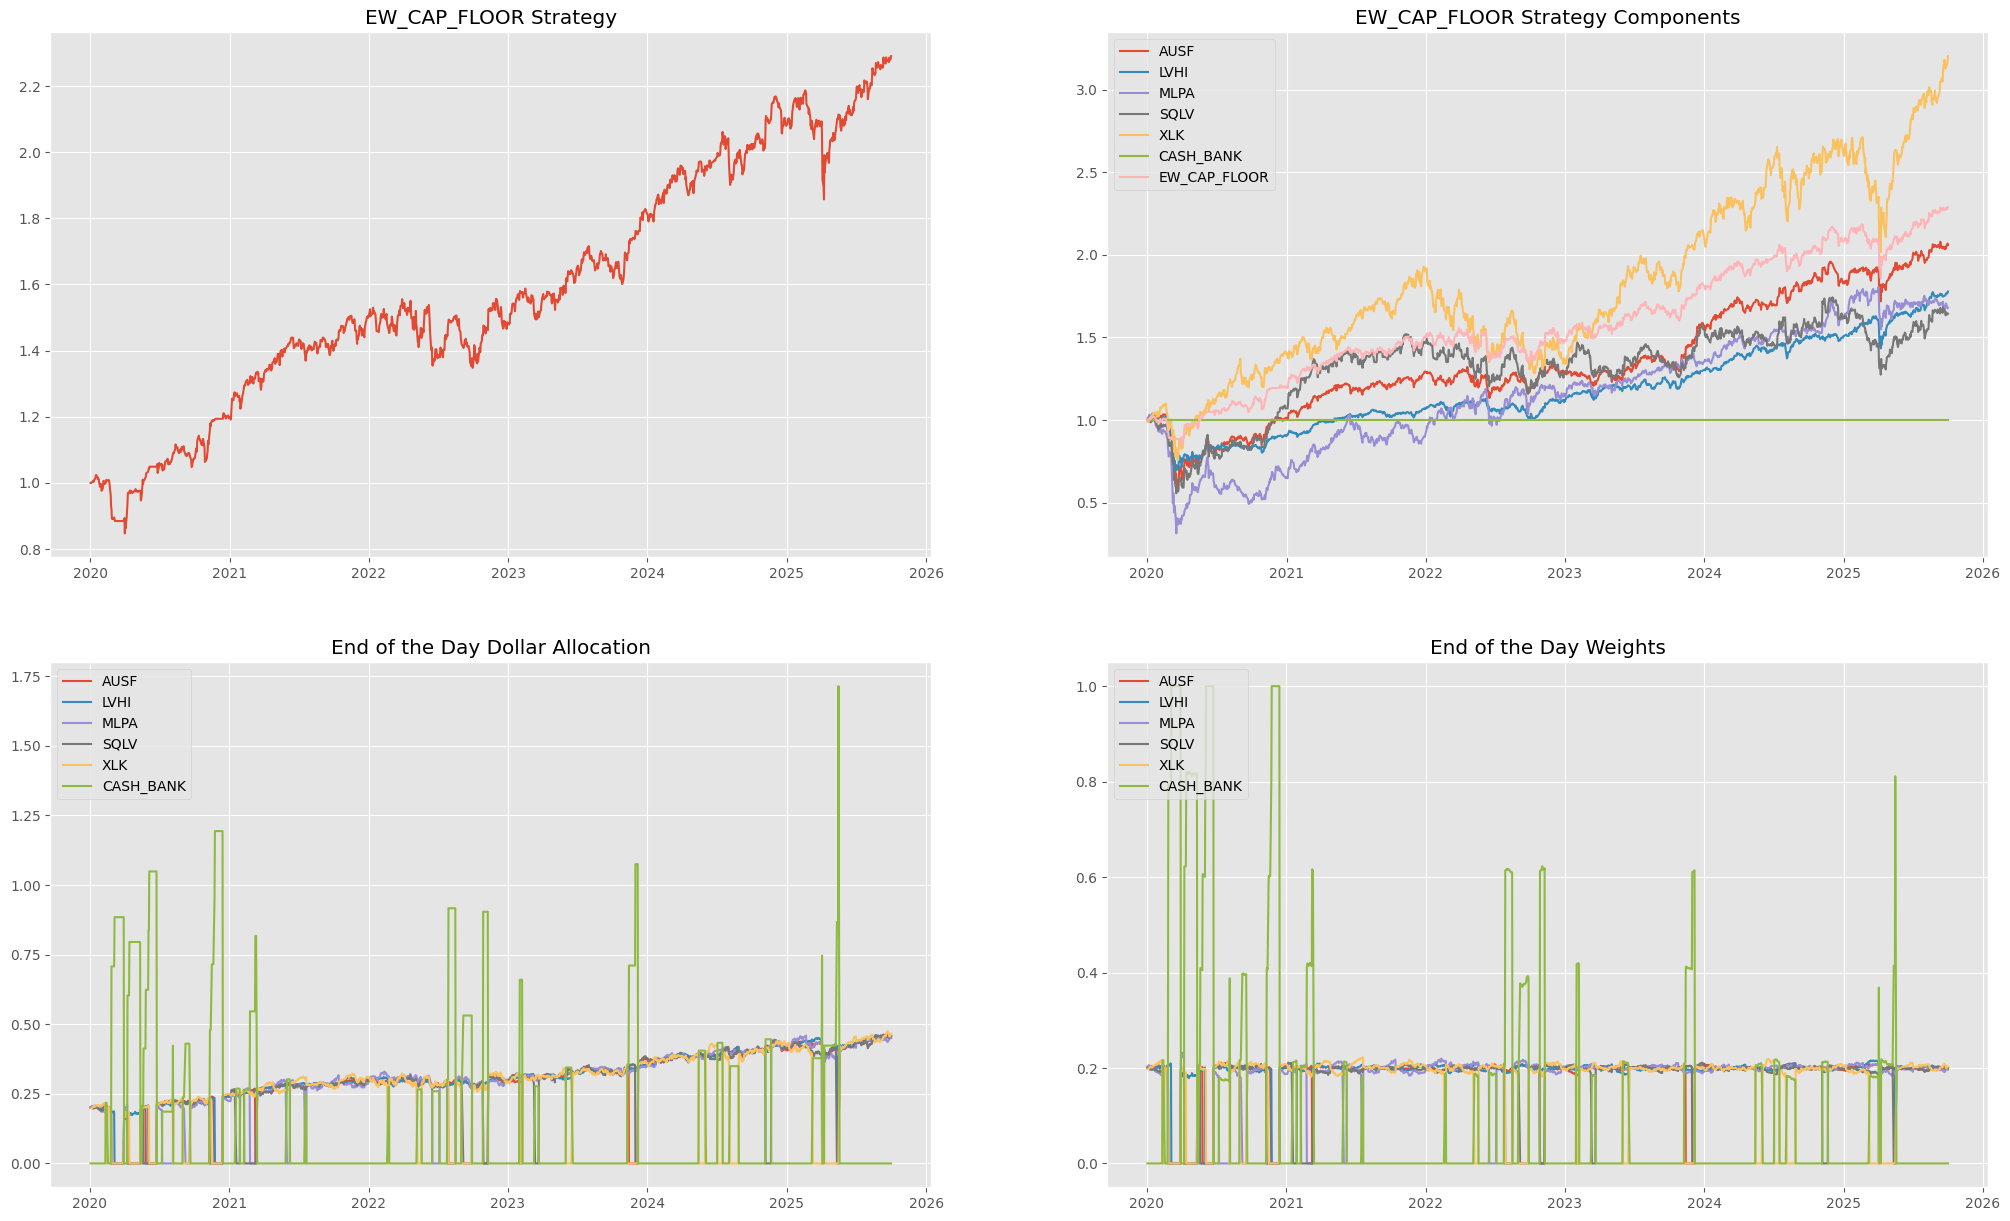

In [3]:
trigger_simulation = TriggerSimulation(returns, allocation_type='ew_cap_floor',safe_asset='cash_bank',
                                       threshold=[0.1,0.1], window=0, rebal = 30)
backtest_results = trigger_simulation.trigger_simulation()

### Dynamic Asset Allocation

In [4]:
m=3.0
start_value=float(1)
kappa=0.8
window=0
rebal = 1
w_bounds=[0,1]
are_returns = True
plot = True

In [5]:
daa = pd.concat([pd.DataFrame(returns['XLK']) , backtest_results['portfolio_value'].pct_change().dropna()], axis = 1)

Summary: 
 strategy: Relative Maximum Drawdown 
 m = 3.0 
 kappa: 0.8 
             rebalancing frequency: 1 
 weight bounds: [0, 1]
using RETURNS...
--- 2.992353916168213 seconds ---


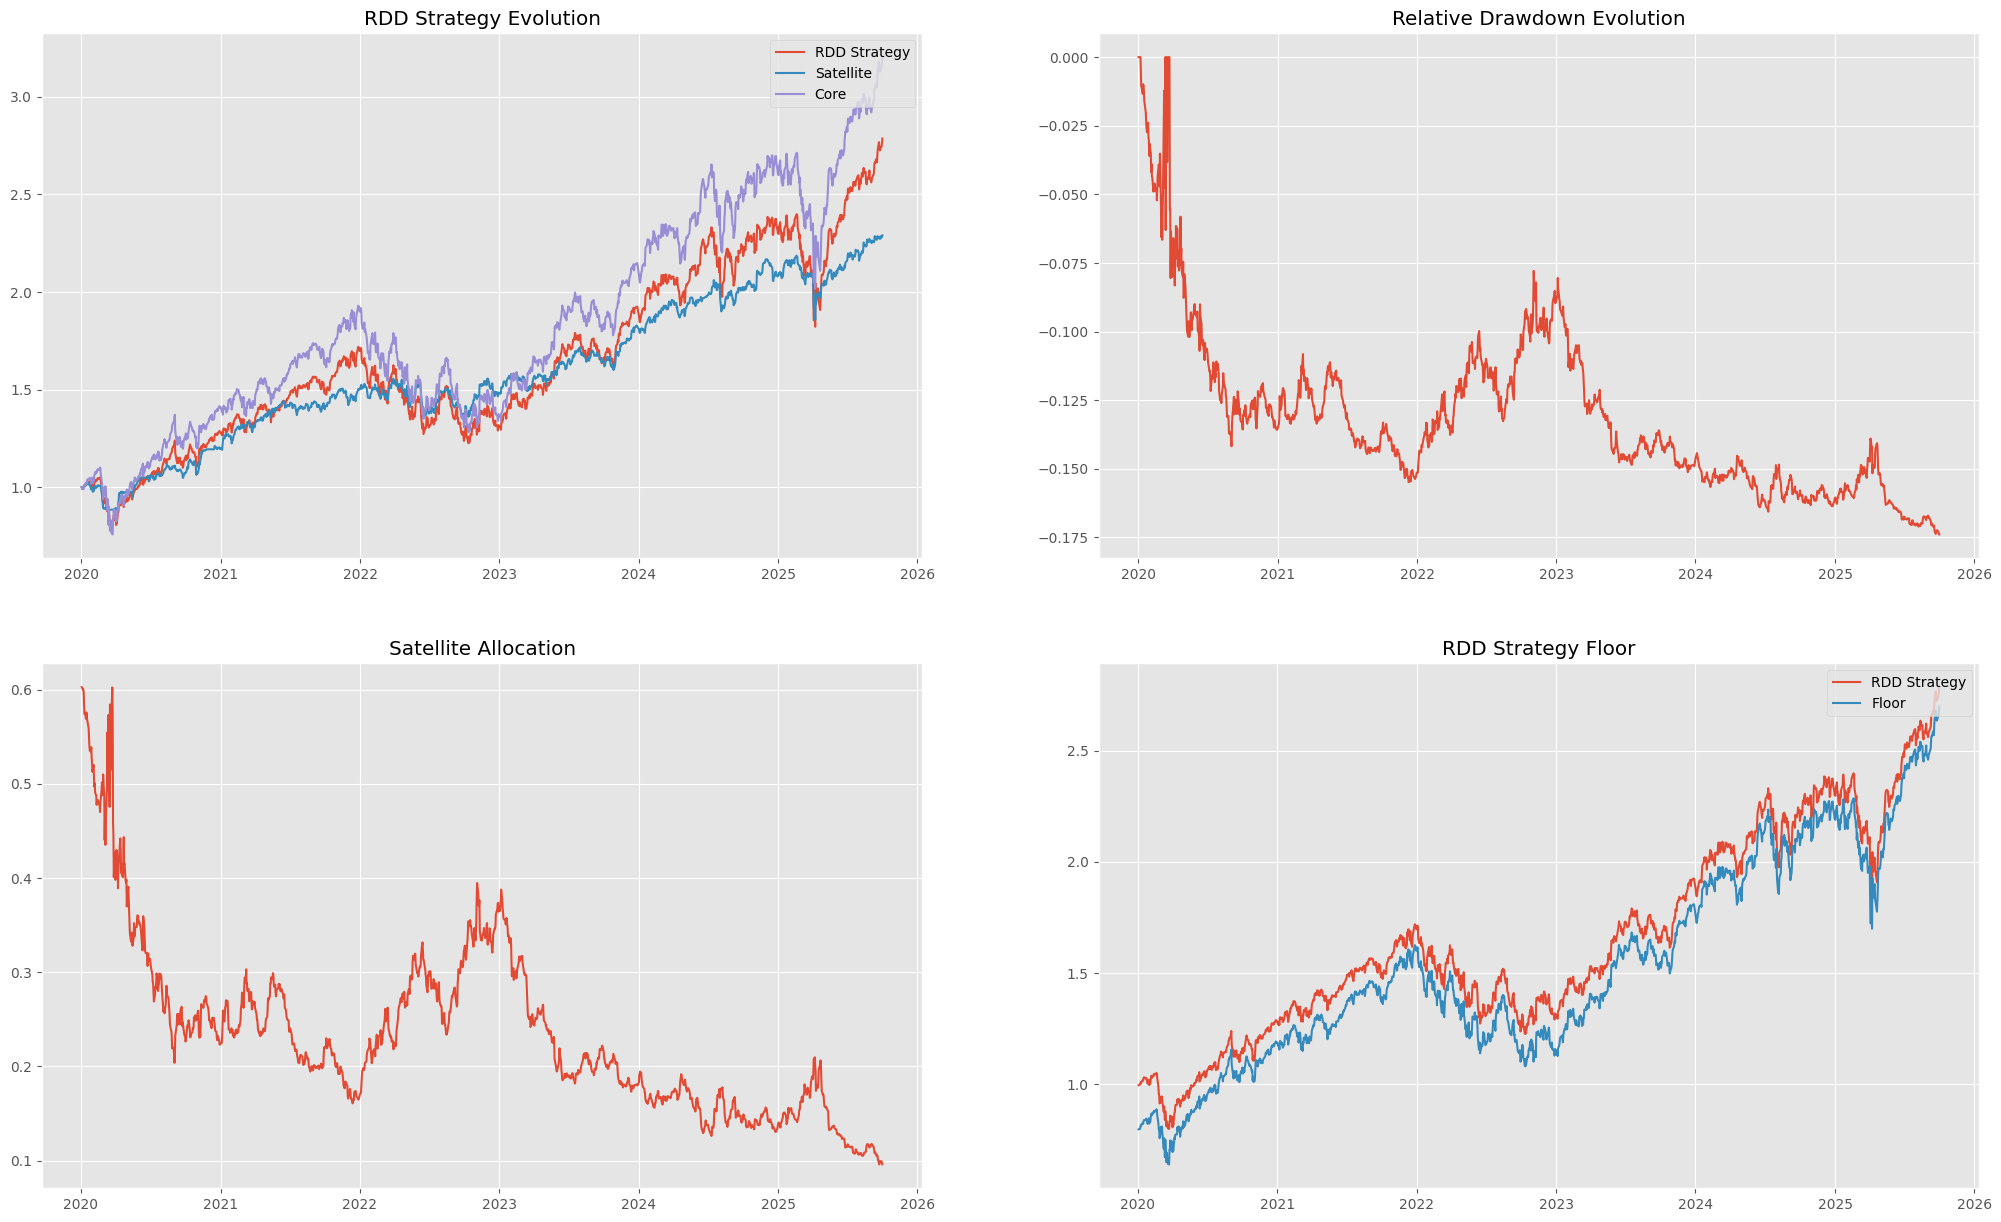

In [6]:
sat_core = False
strategy_type = 'rdd'
strategy_name = strategy_type + '_account'
daa_simulation = DAASimulation(daa, strategy_type, m, kappa, rebal,start_value, window,  sat_core, w_bounds, are_returns, plot)
backtest_result = daa_simulation.daa_simulation()  
results = returns.join(backtest_result['history'][strategy_name].pct_change().dropna(), on = 'Date')

In [7]:
results_table = performance_metrics(results.drop(columns='cash_bank'), ALL_ABS_METRICS, round_to=5)

using RETURNS...
ratio_metric: estimating sharpe_ratio using target of 0.05
cf_value_at_risk: VaR estimated using a confidence level of: 95.0%
ratio_metric: estimating c_f_var_ratio using target of 0.05
cf_value_at_risk: VaR estimated using a confidence level of: 95.0%
hist_value_at_risk: VaR estimated using a confidence level of: 95.0%
ratio_metric: estimating sample_var_ratio using target of 0.05
hist_value_at_risk: VaR estimated using a confidence level of: 95.0%
ratio_metric: estimating cvar_ratio using target of 0.05
using RETURNS...
ratio_metric: estimating calmar_ratio using target of 0.05
using RETURNS...
using RETURNS...
ratio_metric: estimating sterling_ratio using target of 0.05
using RETURNS...
using RETURNS...
ratio_metric: estimating burke_ratio using target of 0.05
using RETURNS...
using RETURNS...
ratio_metric: estimating modified_burke_ratio using target of 0.05
using RETURNS...
computing lower_partial_moments of order: 2
ratio_metric: estimating sortino_ratio using ta

,total_return,annualized_returns,annualized_volatility,sharpe_ratio,skewness,kurtosis,normal_test,cf_value_at_risk,c_f_var_ratio,hist_value_at_risk,...,sortino_ratio,kappa_risk_measure,kappa_ratio,gain_loss_ratio,upside_potential_ratio,omega_ratio_sum_approx,omega_ratio_put_option,sortino_ratio,kappa_ratio,sharpe_ratio_on_avg
AUSF,1.05842,0.13427,0.21210,0.37844,-0.76727,19.91169,0.0,0.01797,4.46699,0.01649,...,0.81966,0.25929,0.30993,1.10104,0.04393,1.10104,1.10343,0.00405,0.00153,0.02967
LVHI,0.77830,0.10568,0.15781,0.33609,-1.75573,24.31122,0.0,0.01480,3.58264,0.01252,...,0.61327,0.24169,0.21973,1.08869,0.03603,1.08869,1.09134,0.00295,0.00106,0.02566
MLPA,0.67985,0.09475,0.32929,0.12940,-2.31953,44.59732,0.0,0.02518,1.69207,0.02327,...,0.34255,0.31751,0.13427,1.06687,0.04991,1.06687,1.06793,0.00314,0.00123,0.01880
SQLV,0.64384,0.09061,0.26669,0.14503,0.13361,6.59651,0.0,0.02324,1.66413,0.02412,...,0.36183,0.26161,0.14807,1.05448,0.05259,1.05448,1.05557,0.00273,0.00112,0.01735
XLK,2.20399,0.22532,0.28130,0.59367,0.03466,8.44223,0.0,0.02391,6.98509,0.02600,...,1.50986,0.26701,0.62633,1.13282,0.05916,1.13282,1.13485,0.00696,0.00289,0.04345
rdd_account,1.78681,0.19585,0.22633,0.61385,0.03510,5.43997,0.0,0.02006,6.92529,0.02225,...,1.39477,0.24388,0.57088,1.12733,0.05467,1.12733,1.12963,0.00620,0.00254,0.04334
